In [32]:
#EXTRACTING PRODUCT NAMES FROM THE REVIEWS(SENTIMENTAL ANALYSIS)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [33]:

df = pd.read_csv("/content/data-2.csv")

df.head()


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,TRUE,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,TRUE,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,TRUE,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,TRUE,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,TRUE,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19528 entries, 0 to 19527
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    19528 non-null  object 
 1   name                  19528 non-null  object 
 2   asins                 19526 non-null  object 
 3   brand                 19528 non-null  object 
 4   categories            19528 non-null  object 
 5   keys                  19528 non-null  object 
 6   manufacturer          19528 non-null  object 
 7   reviews.date          19515 non-null  object 
 8   reviews.dateAdded     17836 non-null  object 
 9   reviews.dateSeen      19527 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   19084 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    19097 non-null  float64
 14  reviews.rating        19499 non-null  float64
 15  reviews.sourceURLs 

In [35]:
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19528 entries, 0 to 19527
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    19528 non-null  object 
 1   name                  19528 non-null  object 
 2   asins                 19526 non-null  object 
 3   brand                 19528 non-null  object 
 4   categories            19528 non-null  object 
 5   keys                  19528 non-null  object 
 6   manufacturer          19528 non-null  object 
 7   reviews.date          19515 non-null  object 
 8   reviews.dateAdded     17836 non-null  object 
 9   reviews.dateSeen      19527 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   19084 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    19097 non-null  float64
 14  reviews.rating        19499 non-null  float64
 15  reviews.sourceURLs 

<Axes: >

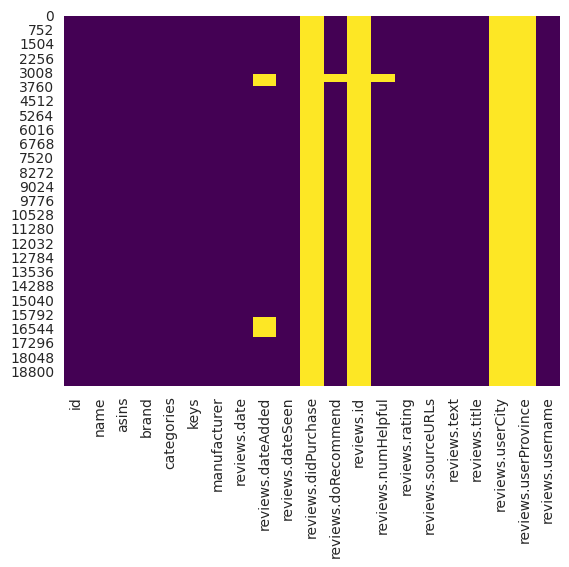

In [36]:
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")

In [37]:
df.drop(['reviews.didPurchase'],inplace =True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19528 entries, 0 to 19527
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    19528 non-null  object 
 1   name                  19528 non-null  object 
 2   asins                 19526 non-null  object 
 3   brand                 19528 non-null  object 
 4   categories            19528 non-null  object 
 5   keys                  19528 non-null  object 
 6   manufacturer          19528 non-null  object 
 7   reviews.date          19515 non-null  object 
 8   reviews.dateAdded     17836 non-null  object 
 9   reviews.dateSeen      19527 non-null  object 
 10  reviews.doRecommend   19084 non-null  object 
 11  reviews.id            1 non-null      float64
 12  reviews.numHelpful    19097 non-null  float64
 13  reviews.rating        19499 non-null  float64
 14  reviews.sourceURLs    19527 non-null  object 
 15  reviews.text       

In [38]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,19097.000000,19499.000000,0.0,0.0
mean,111372787.0,0.456826,4.499205,NaN,NaN
std,NaN,7.197840,0.786553,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,730.000000,5.000000,NaN,NaN


In [39]:
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19528 entries, 0 to 19527
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    19528 non-null  object 
 1   name                  19528 non-null  object 
 2   asins                 19526 non-null  object 
 3   brand                 19528 non-null  object 
 4   categories            19528 non-null  object 
 5   keys                  19528 non-null  object 
 6   manufacturer          19528 non-null  object 
 7   reviews.date          19515 non-null  object 
 8   reviews.dateAdded     17836 non-null  object 
 9   reviews.dateSeen      19527 non-null  object 
 10  reviews.doRecommend   19084 non-null  object 
 11  reviews.id            1 non-null      float64
 12  reviews.numHelpful    19097 non-null  float64
 13  reviews.rating        19499 non-null  float64
 14  reviews.sourceURLs    19527 non-null  object 
 15  reviews.text       

In [40]:
print(data['asins'].unique())
asins_unique=len(data['asins'].unique())
print("Number of Unique asins: "+str(asins_unique))


['B01AHB9CN2' 'B00VINDBJK' 'B005PB2T0S' 'B002Y27P3M' 'B01AHB9CYG'
 'B01AHB9C1E' 'B01J2G4VBG' 'B00ZV9PXP2' 'B0083Q04TA' 'B018Y229OU'
 'B00REQKWGA' 'B00IOYAM4I' 'B018T075DC' nan 'B00DU15MU4' 'B018Y225IA'
 'B005PB2T2Q' 'B018Y23MNM' 'B00OQVZDJM']
Number of Unique asins: 19


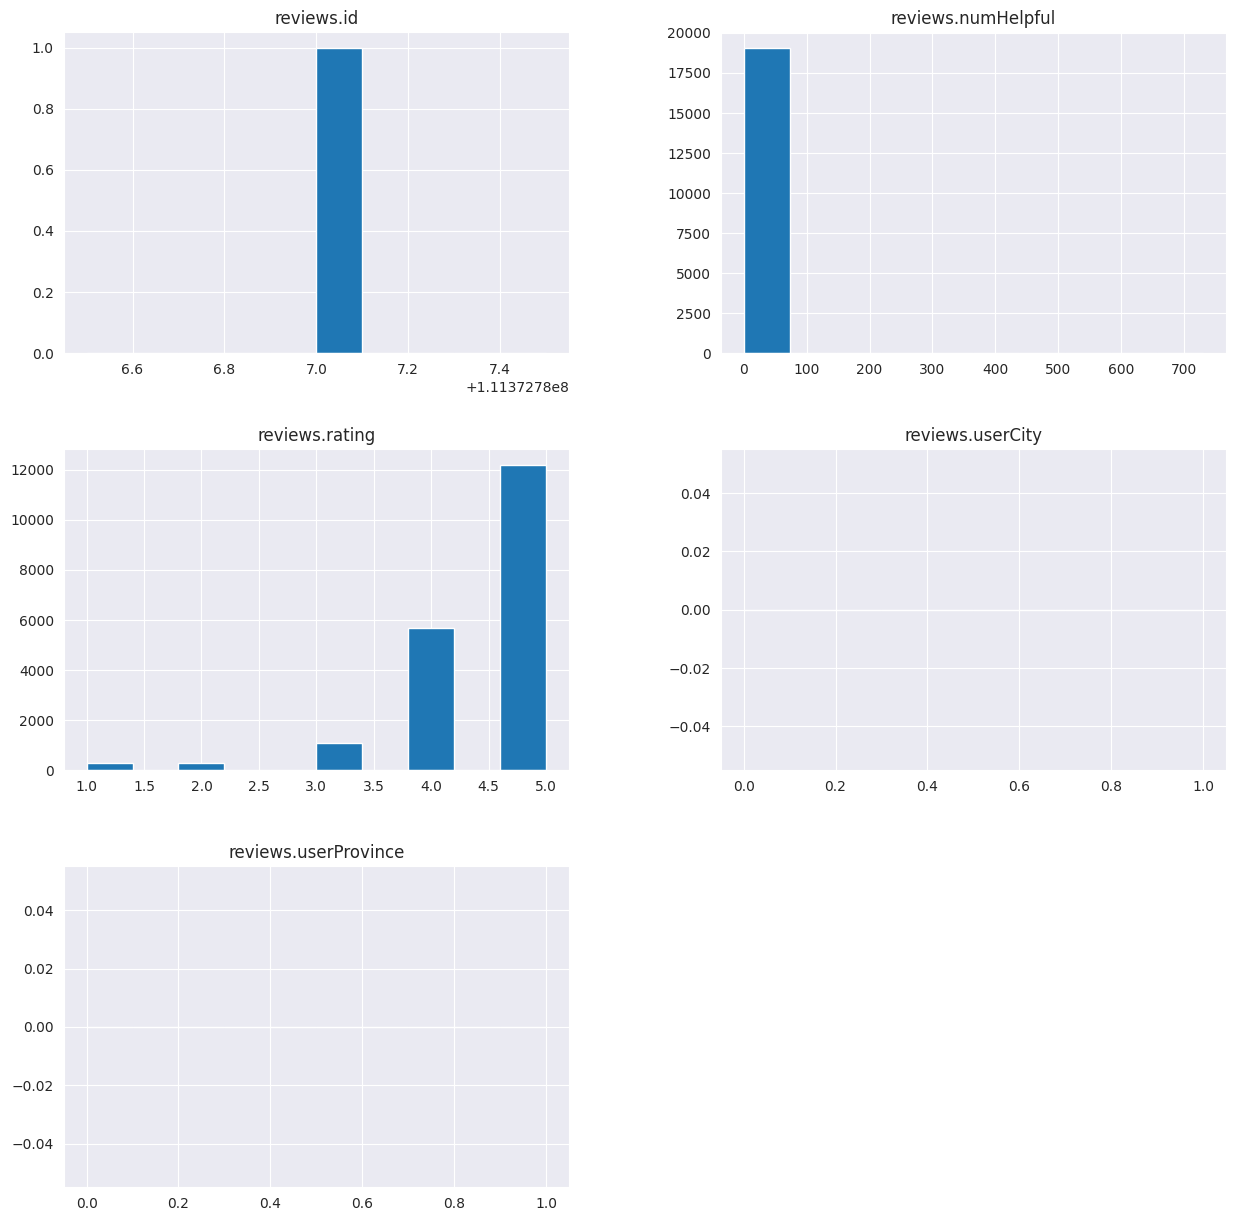

In [41]:
data.hist(figsize=(15,15))
plt.show()

In [42]:
#train and test
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
# now removing all null values from review.rating
data_after=data.dropna(subset=['reviews.rating'])
print("After {}".format(len(data_after)))
data_after['reviews.rating']=data_after['reviews.rating'].astype(int)


Before 19528
After 19499


In [43]:
split=StratifiedShuffleSplit(n_splits=5,test_size=0.2)
for train_index,test_index in split.split(data_after,data_after["reviews.rating"]):
    strat_train=data_after.reindex(train_index)
    strat_test=data_after.reindex(test_index)
strat_train.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
7291,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-10-21T00:00:00.000Z,2017-05-21T01:21:39Z,"2017-04-30T00:09:00.000Z,2017-06-07T08:16:00.000Z",TRUE,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,Probably the best priced tablet on the market....,Good little tablet,NaN,NaN,Gaby
7272,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-10-23T00:00:00.000Z,2017-05-21T01:21:33Z,"2017-04-30T00:09:00.000Z,2017-06-07T08:16:00.000Z",TRUE,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,I did not receive any instructions on how to b...,Difficult to get started.,NaN,NaN,DeesKid2
4833,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-02-09T00:00:00.000Z,2017-05-21T03:22:42Z,"2017-04-30T00:22:00.000Z,2017-06-07T08:12:00.000Z",TRUE,NaN,2.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,It's great for doing anything on Amazon. Howev...,Nicely made,NaN,NaN,pete2b91
4785,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-01-04T00:00:00.000Z,2017-05-21T03:23:53Z,"2017-04-30T00:23:00.000Z,2017-06-07T08:19:00.000Z",TRUE,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,"$50 for a tablet, yes please! I gave it a whir...",The greatest tablet for what it cost,NaN,NaN,KCCO
15051,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2015-12-28T00:00:00.000Z,2017-05-21T03:57:21Z,"2017-04-30T00:25:00.000Z,2017-06-07T08:11:00.000Z",TRUE,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,I purchased this tablet for my child and it ha...,Great tablet for a child,NaN,NaN,Tree


In [44]:
len(strat_train)

15599

In [45]:
len(strat_test)

3900

In [46]:
strat_train["reviews.rating"].value_counts()/len(strat_train)


,count
reviews.rating,
5.0,0.622796
4.0,0.291493
3.0,0.054491
1.0,0.015065
2.0,0.014745


In [47]:
strat_test["reviews.rating"].value_counts()/len(strat_test)

,count
reviews.rating,
5.0,0.632051
4.0,0.286154
3.0,0.055897
1.0,0.012308
2.0,0.011795


In [48]:
#exploratory data exploration (training set)

reviews=strat_train.copy()
reviews.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
7291,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-10-21T00:00:00.000Z,2017-05-21T01:21:39Z,"2017-04-30T00:09:00.000Z,2017-06-07T08:16:00.000Z",TRUE,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,Probably the best priced tablet on the market....,Good little tablet,NaN,NaN,Gaby
7272,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-10-23T00:00:00.000Z,2017-05-21T01:21:33Z,"2017-04-30T00:09:00.000Z,2017-06-07T08:16:00.000Z",TRUE,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,I did not receive any instructions on how to b...,Difficult to get started.,NaN,NaN,DeesKid2


In [49]:
reviews.groupby('asins')['name'].unique()


,name
asins,
B005PB2T0S,"[Amazon Kindle Lighted Leather Cover,,,\nKindl..."
B005PB2T2Q,"[Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1..."
B00DU15MU4,[Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00IOYAM4I,[Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00OQVZDJM,[Amazon Kindle Paperwhite - eBook reader - 4 G...
B00REQKWGA,[Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00VINDBJK,[Kindle Oasis E-reader with Leather Charging C...
B00ZV9PXP2,"[Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include..."
B018T075DC,[Brand New Amazon Kindle Fire 16gb 7 Ips Displ...


In [50]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15599 entries, 7291 to 2745
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15577 non-null  object 
 1   name                  15577 non-null  object 
 2   asins                 15576 non-null  object 
 3   brand                 15577 non-null  object 
 4   categories            15577 non-null  object 
 5   keys                  15577 non-null  object 
 6   manufacturer          15577 non-null  object 
 7   reviews.date          15574 non-null  object 
 8   reviews.dateAdded     14253 non-null  object 
 9   reviews.dateSeen      15577 non-null  object 
 10  reviews.doRecommend   15248 non-null  object 
 11  reviews.id            0 non-null      float64
 12  reviews.numHelpful    15259 non-null  float64
 13  reviews.rating        15577 non-null  float64
 14  reviews.sourceURLs    15577 non-null  object 
 15  reviews.text          

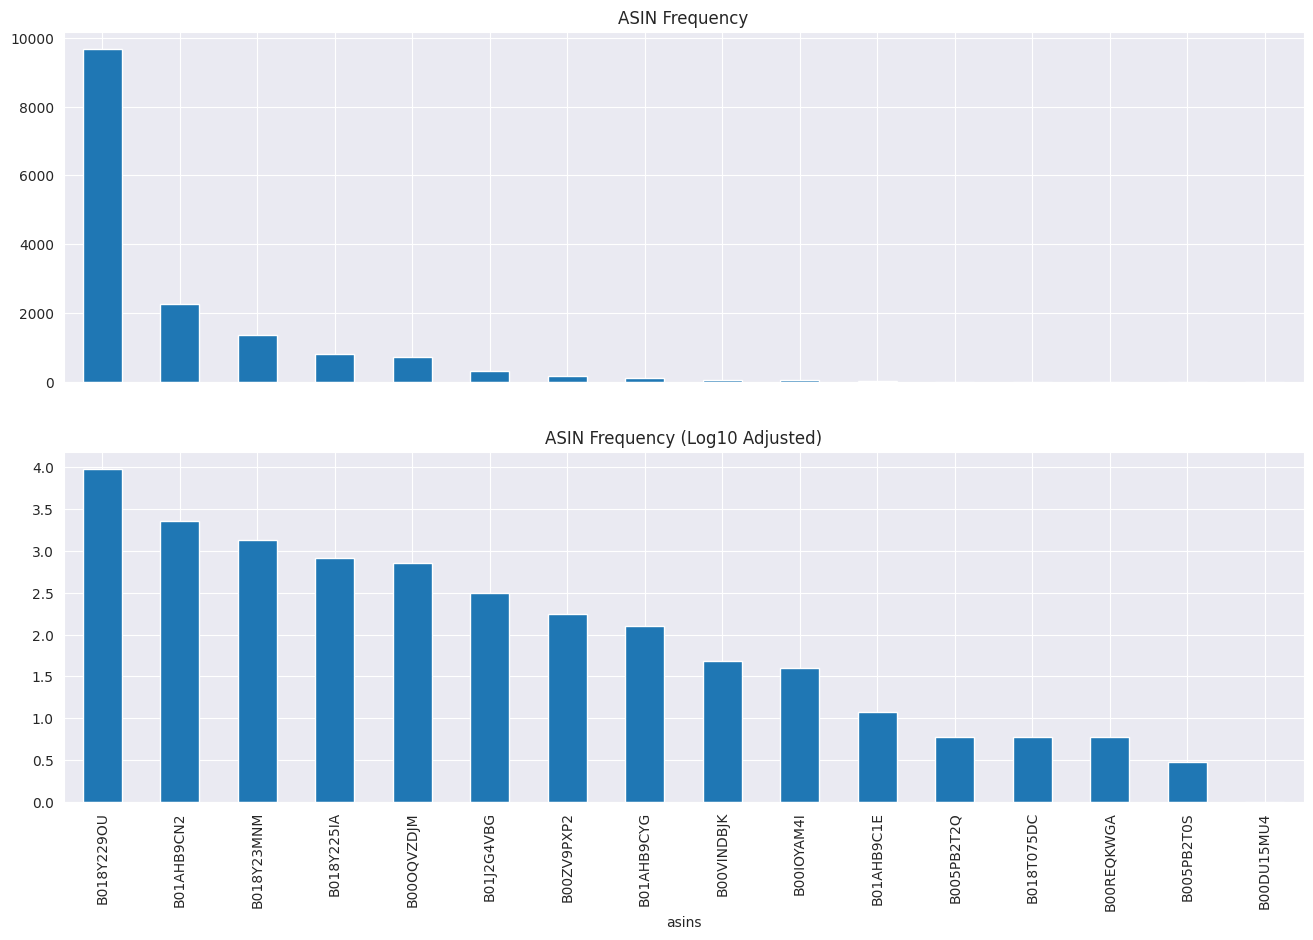

In [51]:
fig = plt.figure(figsize=(16,10))
# we use subplot when we have to see interrelationship btw two graphs
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
# The ax (or Axes object) is the area of the figure where your data appears
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2,
                                               title="ASIN Frequency (Log10 Adjusted)")
# np.log10 normalises our data to visualise the graph and difference much better
plt.show()

In [52]:
reviews['reviews.rating'].mean()


4.494318546575078

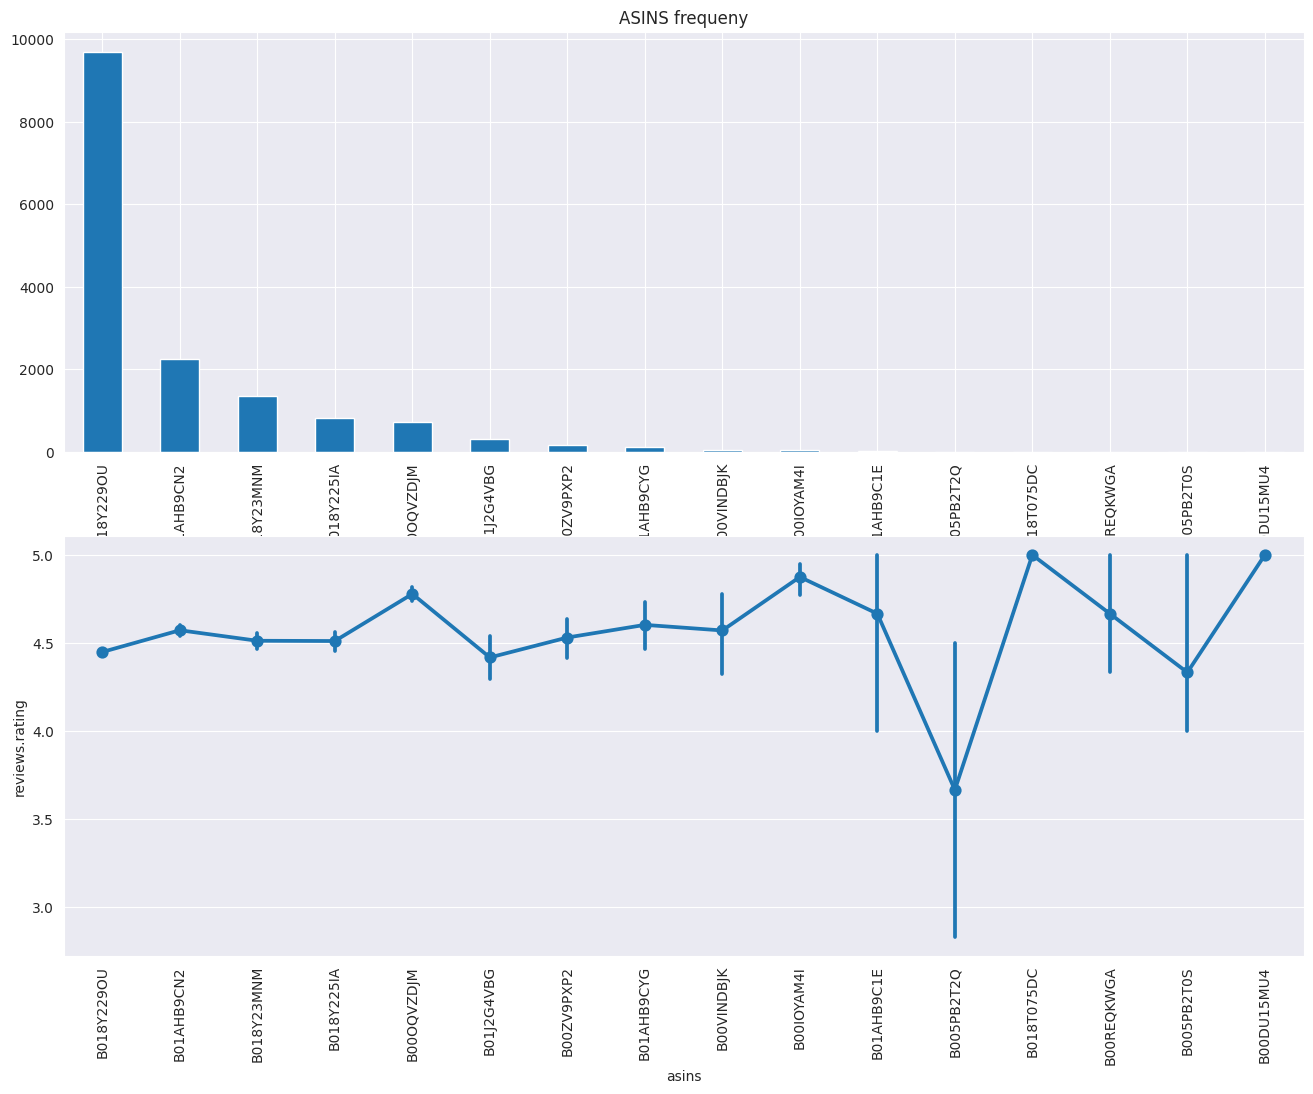

In [53]:
asins_count=reviews['asins'].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews['asins'].value_counts().plot(kind="bar",title="ASINS frequeny")
plt.subplot(2,1,2)
sns.pointplot(x="asins",y="reviews.rating",order=asins_count,data=reviews)
plt.xticks(rotation=90)
plt.show()

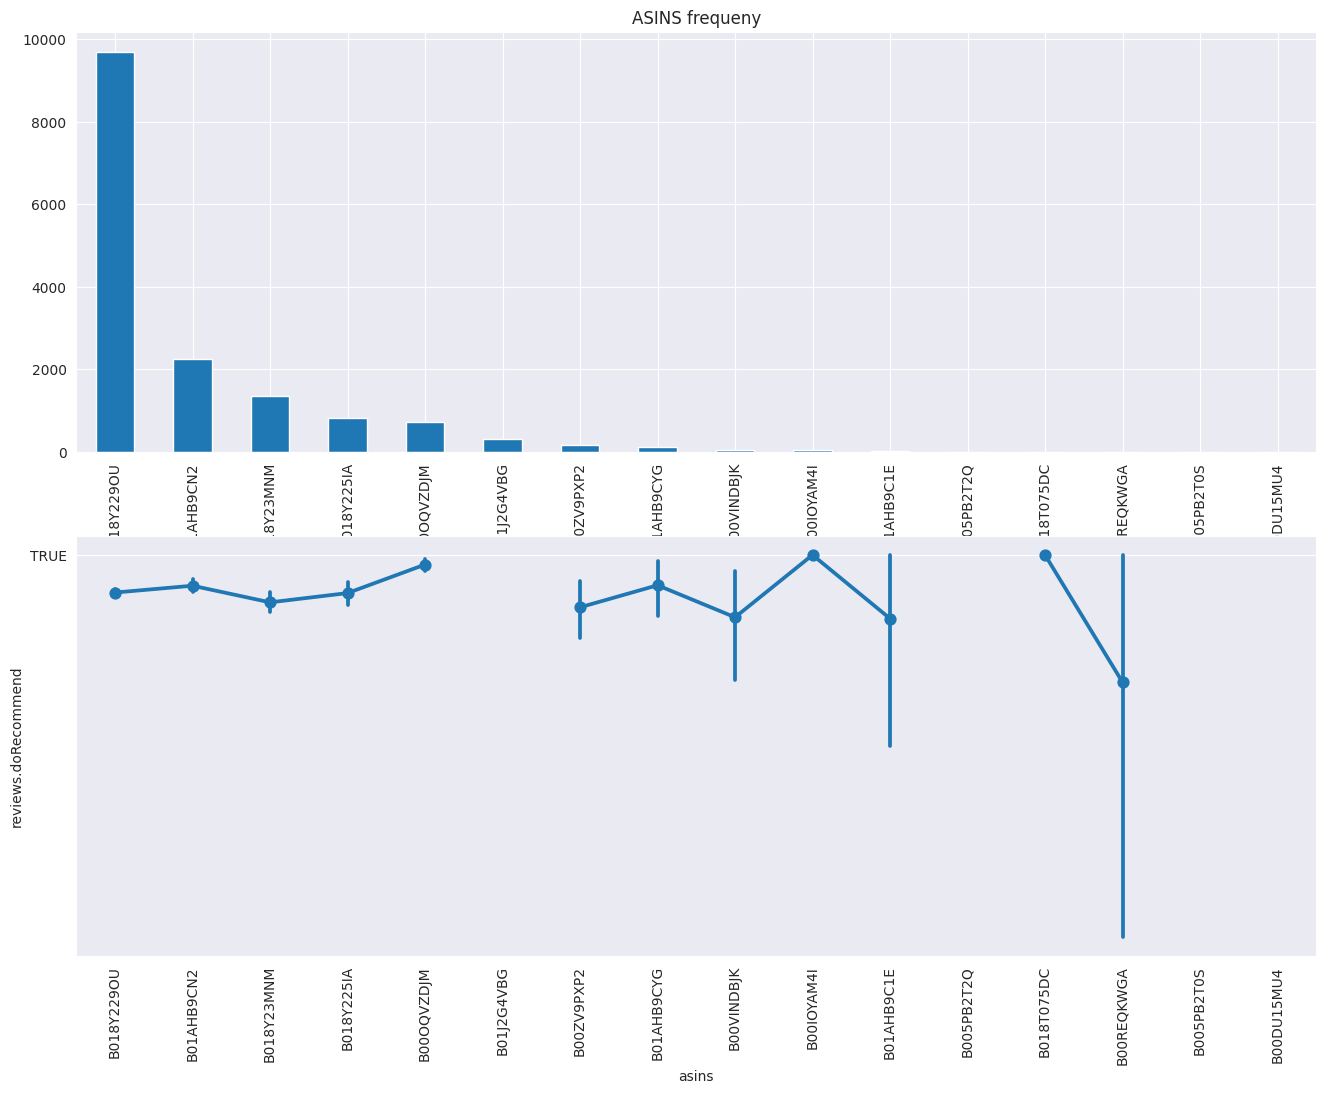

In [54]:
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews['asins'].value_counts().plot(kind="bar",title="ASINS frequeny")
plt.subplot(2,1,2)
sns.pointplot(x="asins",y="reviews.doRecommend",order=asins_count,data=reviews)
plt.xticks(rotation=90)
plt.show()


In [55]:
counts=reviews['asins'].value_counts().to_frame()
avg_rating=reviews.groupby("asins")['reviews.rating'].mean().to_frame()
avg_rating

,reviews.rating
asins,
B005PB2T0S,4.333333
B005PB2T2Q,3.666667
B00DU15MU4,5.000000
B00IOYAM4I,4.875000
B00OQVZDJM,4.778711
B00REQKWGA,4.666667
B00VINDBJK,4.571429
B00ZV9PXP2,4.531429
B018T075DC,5.000000


In [56]:
table=avg_rating.join(counts)
table

,reviews.rating,count
asins,,
B005PB2T0S,4.333333,3
B005PB2T2Q,3.666667,6
B00DU15MU4,5.000000,1
B00IOYAM4I,4.875000,40
B00OQVZDJM,4.778711,714
B00REQKWGA,4.666667,6
B00VINDBJK,4.571429,49
B00ZV9PXP2,4.531429,175
B018T075DC,5.000000,6


In [57]:
counts=reviews['asins'].value_counts().to_frame()
avg_rating=reviews.groupby("asins")['reviews.rating'].mean().to_frame()
avg_rating

,reviews.rating
asins,
B005PB2T0S,4.333333
B005PB2T2Q,3.666667
B00DU15MU4,5.000000
B00IOYAM4I,4.875000
B00OQVZDJM,4.778711
B00REQKWGA,4.666667
B00VINDBJK,4.571429
B00ZV9PXP2,4.531429
B018T075DC,5.000000


In [58]:
table=avg_rating.join(counts)
table

,reviews.rating,count
asins,,
B005PB2T0S,4.333333,3
B005PB2T2Q,3.666667,6
B00DU15MU4,5.000000,1
B00IOYAM4I,4.875000,40
B00OQVZDJM,4.778711,714
B00REQKWGA,4.666667,6
B00VINDBJK,4.571429,49
B00ZV9PXP2,4.531429,175
B018T075DC,5.000000,6


,reviews.rating,count
reviews.rating,1.000000,-0.108529
count,-0.108529,1.000000


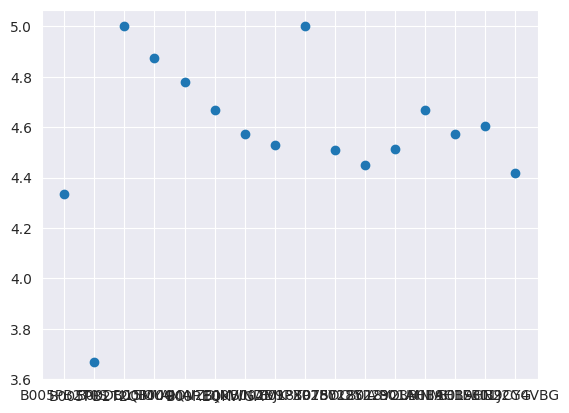

In [59]:
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias "plt"

plt.scatter(table.index, table["reviews.rating"]) # Use the DataFrame index for the x-axis and the "reviews.rating" column for the y-axis.
table.corr()

In [60]:
def sentiments(rating):
    if(rating==5)or(rating==4):
        return "Positive"
    elif rating==3:
        return "Neutral"
    elif(rating==2)or(rating==1):
        return "Negative"

In [61]:
strat_train['Sentiments']=strat_train['reviews.rating'].apply(sentiments)
strat_test['Sentiments']=strat_test['reviews.rating'].apply(sentiments)
# strat_train.head()
strat_train["Sentiments"][:20]

,Sentiments
7291,Positive
7272,Positive
4833,Positive
4785,Positive
15051,Positive
4476,Positive
8416,Positive
16359,Positive
17975,Positive
17101,Positive


In [62]:
x_train=strat_train['reviews.text']
x_train_targetsentiment=strat_train['Sentiments']
x_test=strat_test['reviews.text']
x_test_targetsentiment=strat_test['Sentiments']
print(len(x_train),len(x_test))

15599 3900


In [63]:
# tokenisation: which breaks sentences into words
# stopwords: filtering unwanted words like the ,are etc.
# filling na with space
x_train=x_train.fillna(' ')
x_test=x_test.fillna(' ')
x_train_targetsentiment=x_train_targetsentiment.fillna(' ')
x_test_targetsentiment=x_test_targetsentiment.fillna(' ')
# Text preprocessing and occurence counting using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
x_train_counts=count_vect.fit_transform(x_train)
x_train_counts.shape

(15599, 8501)

In [64]:
from sklearn.feature_extraction.text import TfidfTransformer
tfid_transformer=TfidfTransformer(use_idf=False)
x_train_tfid=tfid_transformer.fit_transform(x_train_counts)
x_train_tfid.shape

(15599, 8501)

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe=Pipeline([('vect',CountVectorizer()),
                               ("tfidf",TfidfTransformer()),
                               ("clf_nominalNB",MultinomialNB())])
clf_multiNB_pipe.fit(x_train,x_train_targetsentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [66]:
predict_multiNB=clf_multiNB_pipe.predict(x_test)
predict_multiNB

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [67]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(x_test_targetsentiment,predict_multiNB)))

Accuracy: 0.9182051282051282


In [68]:
x_test

,reviews.text
1717,Excellent value for small laptops. Lenovo 11.2...
1557,Purchased the 8 inch Fire tablet during Black ...
18159,My daughter who is two loves it. She colors an...
10423,I bought this for my mom because she was havin...
2583,One of the fastest tablets I ever had. Netflix...
...,...
19132,Was undecided between new PaperWhite and Voyag...
12713,This is a great tablet and you can't beat the ...
16643,I'm very tough on dishwashers and this one see...
3491,"I like this e reader, but wish the screen were..."


In [69]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()),
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(x_train, x_train_targetsentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(x_test)
print('Accuracy: {}'. format(accuracy_score(x_test_targetsentiment,
                             predictedLinearSVC)))

Accuracy: 0.9256410256410257


In [70]:
new_text=["the tablet is good , really liked it",
         "the tablet is ok,it's working",
         "The tablet is not good, does not work waste"]
clf_linearSVC_pipe.predict(new_text)

array(['Positive', 'Neutral', 'Negative'], dtype=object)

# New Section